In [2]:
import functions as func
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from importlib import reload
reload(func)

<module 'functions' from 'c:\\Users\\egil-\\OneDrive - Universitetet i Oslo\\FYS-STK4155\\FYS-STK_Project_3\\Code\\functions.py'>

# FFNN

Epoch 0, Loss: 11.964290618896484
Epoch 100, Loss: 1.9950504302978516
Epoch 200, Loss: 0.6895207762718201
Epoch 300, Loss: 0.3609800636768341
Epoch 400, Loss: 0.20910747349262238
Epoch 500, Loss: 0.13483783602714539
Epoch 600, Loss: 0.09307486563920975


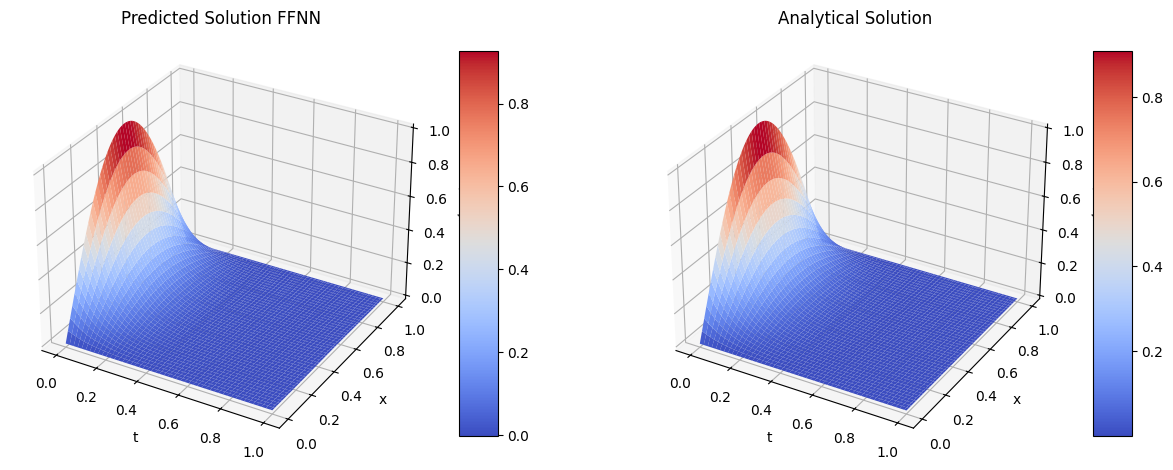

In [4]:
# Hyperparameters
num_hidden_layers = 2
num_nodes_per_layer = 10
activation = "tanh"
learning_rate = 0.01
epochs = 700
grid_points = 100

x = tf.linspace(0.0, 1.0, grid_points)
t = tf.linspace(0.0, 1.0, grid_points)
X, T = tf.meshgrid(x, t)
x_flat = tf.reshape(X, (-1, 1))
t_flat = tf.reshape(T, (-1, 1))
inputs = tf.concat([x_flat, t_flat], axis=1)

model = func.DiffusionNN(num_hidden_layers, num_nodes_per_layer, activation)
optimizer = tf.keras.optimizers.Adam(learning_rate)
func.train_model(model, optimizer, x_flat, t_flat, epochs)
nn_output = model(inputs)
u_nn = func.trial_solution(x_flat, t_flat, nn_output)
U_nn = tf.reshape(u_nn, X.shape).numpy()
U_analytical = func.analytical_solution(X.numpy(), T.numpy())

# Plot both solutions in the same figure
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121, projection='3d')
surface_nn = ax1.plot_surface(T.numpy(), X.numpy(), U_nn, cmap='coolwarm', edgecolor='none')
fig.colorbar(surface_nn, ax=ax1, shrink=0.5, aspect=10)
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.set_zlabel('u(x, t)')
ax1.set_title('Predicted Solution FFNN')
ax1.view_init(elev=30, azim=-60) 

ax2 = fig.add_subplot(122, projection='3d')
surface_analytical = ax2.plot_surface(T.numpy(), X.numpy(), U_analytical, cmap='coolwarm', edgecolor='none')
fig.colorbar(surface_analytical, ax=ax2, shrink=0.5, aspect=10)
ax2.set_xlabel('t')
ax2.set_ylabel('x')
ax2.set_zlabel('u(x, t)')
ax2.set_title('Analytical Solution')
ax2.view_init(elev=30, azim=-60)

plt.show()

In [ ]:
# Hyperparameters for tuning
num_hidden_layers = [1, 3, 5]
num_nodes_per_layer = [5, 10, 20]
activation = ["tanh", "sigmoid", "relu"]
learning_rate = [0.1, 0.01, 0.001]
epochs = 1000
grid_points = 10
results_list = []

# Create the grid
x = tf.reshape(tf.linspace(0.0, 1.0, grid_points), (-1, 1))
t = tf.reshape(tf.linspace(0.0, 1.0, grid_points), (-1, 1))
X, T = tf.meshgrid(x, t)
x_flat = tf.reshape(X, (-1, 1))
t_flat = tf.reshape(T, (-1, 1))
inputs = tf.concat([x_flat, t_flat], axis=1)



for n_hidden in num_hidden_layers:
    for n_nodes in num_nodes_per_layer:
        for act in activation:
            for lr in learning_rate:
                model = func.DiffusionNN(n_hidden, n_nodes, act)
                optimizer = tf.keras.optimizers.Adam(lr)
                print(f"Number of hidden layers: {n_hidden}\nNodes per layer: {n_nodes}\nActivation function: {act}\nLearning rate: {lr}")
                func.train_model(model, optimizer, x_flat, t_flat, epochs)
                loss = func.compute_loss(model, x_flat, t_flat)
                results_list.append({
                        "n_hidden": n_hidden,
                        "n_nodes": n_nodes,
                        "activation": act,
                        "learning_rate": lr,
                        "loss": loss
                    })
                print(f"Final loss: {loss:.4f}\n")
results = pd.DataFrame(results_list)

Number of hidden layers: 1
Nodes per layer: 5
Activation function: tanh
Learning rate: 0.1
Epoch 0, Loss: 13.537160873413086
Epoch 100, Loss: 1.6589648723602295
Epoch 200, Loss: 1.0132368803024292
Epoch 300, Loss: 0.7746189832687378
Epoch 400, Loss: 0.814463198184967
Epoch 500, Loss: 0.5493376851081848
Epoch 600, Loss: 0.4908563494682312
Epoch 700, Loss: 0.44169411063194275
Epoch 800, Loss: 0.41036316752433777
Epoch 900, Loss: 0.3811582624912262
Final loss: 0.3625

Number of hidden layers: 1
Nodes per layer: 5
Activation function: tanh
Learning rate: 0.01
Epoch 0, Loss: 11.523681640625
Epoch 100, Loss: 5.810866832733154
Epoch 200, Loss: 3.343470573425293
Epoch 300, Loss: 2.3648085594177246
Epoch 400, Loss: 1.9671127796173096
Epoch 500, Loss: 1.665708303451538
Epoch 600, Loss: 1.4296388626098633
Epoch 700, Loss: 1.241969108581543
Epoch 800, Loss: 1.087735652923584
Epoch 900, Loss: 0.9548242688179016
Final loss: 0.8320

Number of hidden layers: 1
Nodes per layer: 5
Activation function: t

In [4]:
results["loss"] = results["loss"].apply(float)
results = results.sort_values(by="loss", ascending=True)
results.to_latex("../Figures/results_table.tex", index=False)

NameError: name 'results' is not defined

C:\Users\egil-\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 0, Loss: 0.09796562045812607
Epoch 100, Loss: 0.0019030397525057197
Epoch 200, Loss: 0.0007460928172804415


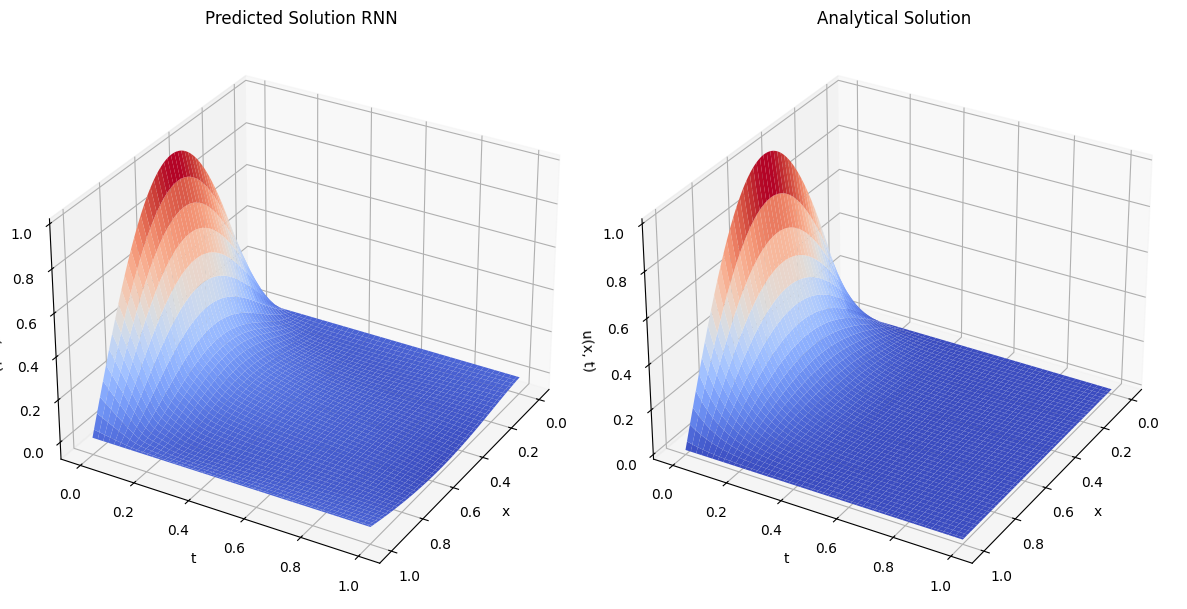

In [5]:
#RNN model

# Hyperparameters
num_hidden_layers = 3
num_units_per_layer = 20
activation = 'tanh'
learning_rate = 0.01
epochs = 300
grid_points = 100

U_analytical = np.exp(-np.pi**2 * T) * np.sin(np.pi * X)
u_true = tf.reshape(U_analytical, (-1, 1))

model = func.build_rnn(num_hidden_layers, num_units_per_layer, activation)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
func.train_model_RNN(model, x_flat, t_flat, u_true, optimizer, epochs)

inputs = func.reshape_for_rnn(x_flat, t_flat)
nn_output = model(inputs)
u_pred = func.trial_solution(x_flat, t_flat, nn_output)
U_pred = tf.reshape(u_pred, X.shape).numpy()

# Plot the results
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
func.plot_solution(X.numpy(), T.numpy(), U_pred, "Predicted Solution RNN", ax1)
ax1.view_init(elev=30, azim=30)  # Adjust view angle
ax2 = fig.add_subplot(122, projection='3d')
func.plot_solution(X.numpy(), T.numpy(), U_analytical, "Analytical Solution", ax2)
ax2.view_init(elev=30, azim=30)  # Adjust view angle

plt.tight_layout()
plt.show()


# RNN

In [ ]:
import pandas as pd
import tensorflow as tf

# Hyperparameters
num_hidden_layers = [1, 3, 5]
num_nodes_per_layer = [5, 10, 20]
activation = ["tanh", "sigmoid", "relu"]
learning_rate = [0.1, 0.01, 0.001]
epochs = 1000
grid_points = 10
results_list = []

# Grid
x = tf.reshape(tf.linspace(0.0, 1.0, grid_points), (-1, 1))
t = tf.reshape(tf.linspace(0.0, 1.0, grid_points), (-1, 1))
X, T = tf.meshgrid(x, t)
x_flat = tf.reshape(X, (-1, 1))
t_flat = tf.reshape(T, (-1, 1))

for n_hidden in num_hidden_layers:
    for n_nodes in num_nodes_per_layer:
        for act in activation:
            for lr in learning_rate:
                print(f"Number of hidden layers: {n_hidden}\nNodes per layer: {n_nodes}\nActivation function: {act}\nLearning rate: {lr}")
                model = func.build_rnn(n_hidden, n_nodes, act)
                optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
                func.train_model_RNN(model, x_flat, t_flat, u_true, optimizer, epochs)
                loss = func.loss_fn(model, x_flat, t_flat, u_true)
                
                results_list.append({
                    "n_hidden": n_hidden,
                    "n_nodes": n_nodes,
                    "activation": act,
                    "learning_rate": lr,
                    "loss": loss.numpy()
                })
                print(f"Final loss: {loss.numpy():.4f}\n")

results = pd.DataFrame(results_list)


Number of hidden layers: 1
Nodes per layer: 5
Activation function: tanh
Learning rate: 0.1
Epoch 0, Loss: 0.0763
Epoch 100, Loss: 0.0009
Epoch 200, Loss: 0.0003
Epoch 300, Loss: 0.0001
Epoch 400, Loss: 0.0001
Epoch 500, Loss: 0.0001
Epoch 600, Loss: 0.0001
Epoch 700, Loss: 0.0001
Epoch 800, Loss: 0.0003
Epoch 900, Loss: 0.0000
Final loss: 0.0000

Number of hidden layers: 1
Nodes per layer: 5
Activation function: tanh
Learning rate: 0.01
Epoch 0, Loss: 0.1118
Epoch 100, Loss: 0.0219
Epoch 200, Loss: 0.0075
Epoch 300, Loss: 0.0009
Epoch 400, Loss: 0.0003
Epoch 500, Loss: 0.0002
Epoch 600, Loss: 0.0001
Epoch 700, Loss: 0.0001
Epoch 800, Loss: 0.0001
Epoch 900, Loss: 0.0001
Final loss: 0.0001

Number of hidden layers: 1
Nodes per layer: 5
Activation function: tanh
Learning rate: 0.001
Epoch 0, Loss: 0.0782
Epoch 100, Loss: 0.0354
Epoch 200, Loss: 0.0309
Epoch 300, Loss: 0.0273
Epoch 400, Loss: 0.0234
Epoch 500, Loss: 0.0206
Epoch 600, Loss: 0.0197
Epoch 700, Loss: 0.0192
Epoch 800, Loss: 0

In [ ]:
results["loss"] = results["loss"].apply(float)
results_ascending = results.sort_values(by="loss", ascending=True)
#results_ascending.to_latex("../Figures/resultsRNN_table.tex", index=False)

In [10]:
#Plotting training loss as a function of epoch for best FFNN and RNN model respectively
epochs = 1000
grid_points = 10

# Grid
x = tf.reshape(tf.linspace(0.0, 1.0, grid_points), (-1, 1))
t = tf.reshape(tf.linspace(0.0, 1.0, grid_points), (-1, 1))
X, T = tf.meshgrid(x, t)
x_flat = tf.reshape(X, (-1, 1))
t_flat = tf.reshape(T, (-1, 1))
U_analytical = np.exp(-np.pi**2 * T) * np.sin(np.pi * X)
u_true = tf.reshape(U_analytical, (-1, 1))

best_FFNN = func.DiffusionNN(3, 20, "sigmoid")
best_FFNN_optimizer = tf.keras.optimizers.Adam(0.1)
loss_FFNN = func.train_model(best_FFNN, best_FFNN_optimizer, x_flat, t_flat, epochs, return_loss = True)

best_RNN = func.build_rnn(3, 20, "tanh")
best_RNN_optimizer = tf.keras.optimizers.Adam(0.01)
loss_RNN = func.train_model_RNN(best_RNN, x_flat, t_flat, u_true, best_RNN_optimizer, epochs, return_loss = True)

Epoch 0, Loss: 14.928345680236816
Epoch 100, Loss: 0.4289618730545044
Epoch 200, Loss: 0.010772353038191795
Epoch 300, Loss: 0.005861805751919746
Epoch 400, Loss: 0.0909673273563385
Epoch 500, Loss: 0.0023430839646607637
Epoch 600, Loss: 0.0019222758710384369
Epoch 700, Loss: 0.004179853014647961
Epoch 800, Loss: 0.0011162325972691178
Epoch 900, Loss: 0.0010040767956525087
Epoch 0, Loss: 0.07479532063007355
Epoch 100, Loss: 0.0016837562434375286
Epoch 200, Loss: 0.0005642054602503777
Epoch 300, Loss: 0.00024598598247393966
Epoch 400, Loss: 9.437624248676002e-05
Epoch 500, Loss: 7.771696255076677e-05
Epoch 600, Loss: 5.442311521619558e-05
Epoch 700, Loss: 0.00028289484907872975
Epoch 800, Loss: 2.490134647814557e-05
Epoch 900, Loss: 1.9151817468809895e-05


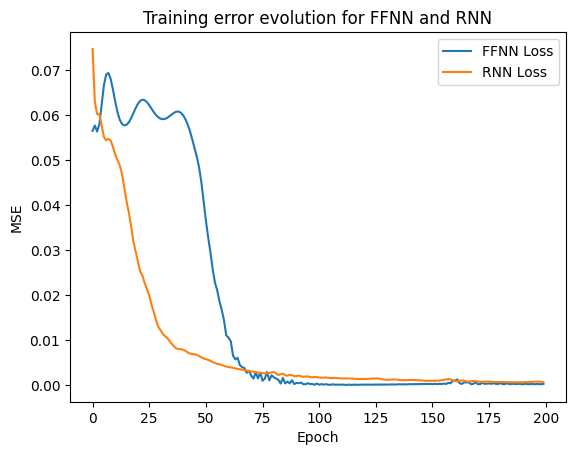

In [17]:
x_axis = np.arange(epochs)[:200]
plt.plot(x_axis, loss_FFNN[:200], label = "FFNN Loss")
plt.plot(x_axis, loss_RNN[:200], label = "RNN Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Training error evolution for FFNN and RNN")
plt.savefig("../Figures/loss_evolution.png")
plt.show()

## Plotting the surface for FFNN, Analytical and RNN in one plot



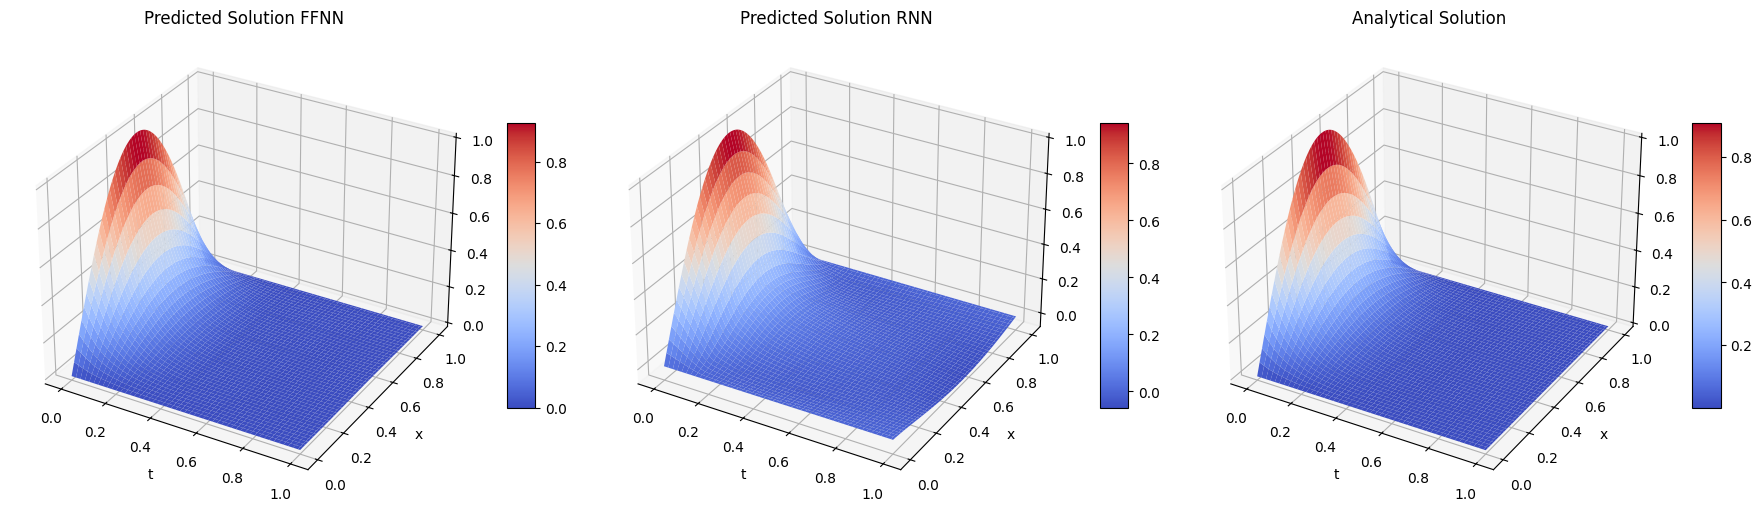

In [9]:
fig = plt.figure(figsize=(18, 6))

# Plotting for FFNN 
ax1 = fig.add_subplot(131, projection='3d')
surface_nn = ax1.plot_surface(T.numpy(), X.numpy(), U_nn, cmap='coolwarm', edgecolor='none')
fig.colorbar(surface_nn, ax=ax1, shrink=0.5, aspect=10)
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.set_title('Predicted Solution FFNN')
ax1.view_init(elev=30, azim = -60)

# Plotting the surface for RNN
ax3 = fig.add_subplot(132, projection='3d')
surface_RNN = ax3.plot_surface(T.numpy(), X.numpy(), U_pred, cmap='coolwarm', edgecolor='none')
fig.colorbar(surface_RNN, ax=ax3, shrink=0.5, aspect=10)
ax3.set_xlabel('t')
ax3.set_ylabel('x')
ax3.set_title('Predicted Solution RNN')
ax3.view_init(elev=30, azim= -60)


# Plotting the surface for Analytical
ax2 = fig.add_subplot(133, projection='3d')
surface_analytical = ax2.plot_surface(T.numpy(), X.numpy(), U_analytical, cmap='coolwarm', edgecolor='none')
fig.colorbar(surface_analytical, ax=ax2, shrink=0.5, aspect=10)
ax2.set_xlabel('t')
ax2.set_ylabel('x')
ax2.set_title('Analytical Solution')
ax2.view_init(elev=30, azim=-60)


plt.tight_layout()
plt.savefig("../Figures/Plotting_surfaces.png")
plt.show()


# Explicit scheme

In [ ]:
import numpy as np
from functions import explicit_scheme, analytical_solution

## Create surfaces for the two cases

In [ ]:
# Case 1
n10 = 10
dt_n10 = 600
u_n10 = explicit_scheme(n=n10, dt=dt_n10)

# Case 2
n100 = 100
dt_n100 = 60000
u_n100 = explicit_scheme(n=n100, dt=dt_n100)

alpha = 0.16666666666666666
alpha = 0.16666666666666666


In [ ]:
# Calculate MSE for predicted surfaces

# Delta x =10
x10 = np.linspace(0, 1, n10+1)
y10 = np.linspace(0, 1, dt_n10+1)
X10, Y10 = np.meshgrid(x10, y10)

analytical_10 = analytical_solution(X10, Y10)
M, N = X10.shape
MSE10 = ((u_n10.T - analytical_10)**2).mean()
print(MSE10)

# Delta x = 100
x100 = np.linspace(0, 1, n100+1)
y100 = np.linspace(0, 1, dt_n100+1)
X100, Y100 = np.meshgrid(x100, y100)

analytical_100 = analytical_solution(X100, Y100)
M,N = X100.shape
MSE100 = ((u_n100.T - analytical_100)**2).mean()
print(MSE100)

3.806913063097459e-12
4.082747665276796e-20


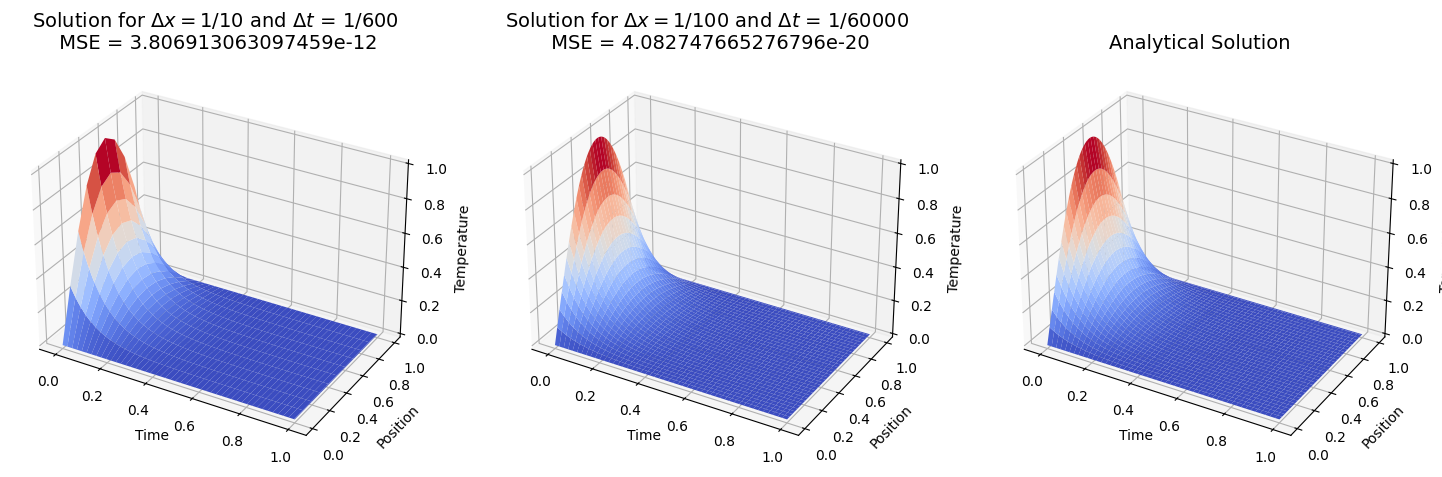

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure
fig = plt.figure(figsize=(18, 6))

# Delta x = 10
x10 = np.linspace(0, 1, n10+1)
y10 = np.linspace(0, 1, dt_n10+1)
X10, Y10 = np.meshgrid(x10, y10)

# Plot the first array
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(Y10, X10, u_n10.T, cmap='coolwarm')
ax1.set_box_aspect([1.5,1,1])
ax1.set_title(rf'Solution for $\Delta x = 1/{n10}$ and $\Delta t$ = 1/{dt_n10}' f'\n MSE = {MSE10}', fontsize=14)
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.set_zlabel('Temperature')

# Delta x = 100
x100 = np.linspace(0, 1, n100+1)
y100 = np.linspace(0, 1, dt_n100+1)
X100, Y100 = np.meshgrid(x100, y100)

# Plot the second array
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(Y100, X100, u_n100.T, cmap='coolwarm')
ax2.set_box_aspect([1.5,1,1])
ax2.set_title(rf'Solution for $\Delta x = 1/{n100}$ and $\Delta t$ = 1/{dt_n100}' f'\n MSE = {MSE100}', fontsize=14)
ax2.set_xlabel('Time')
ax2.set_ylabel('Position')
ax2.set_zlabel('Temperature')

# Analytical solution
U_analytical = analytical_solution(X100, Y100)

# Plot analytical solution
ax3 = fig.add_subplot(133, projection='3d')
surface_analytical = ax3.plot_surface(Y100, X100, U_analytical, cmap='coolwarm', edgecolor='none')
#fig.colorbar(surface_analytical, ax=ax2, shrink=0.5, aspect=10)
ax3.set_box_aspect([1.5,1,1])
ax3.set_xlabel('Time')
ax3.set_ylabel('Position')
ax3.set_zlabel('Temperature')
ax3.set_title('Analytical Solution', fontsize=14)
#ax3.view_init(elev=30, azim=-60)


# Save and show the plots
fig.subplots_adjust(wspace=0.2)  # Increase horizontal space between plots
plt.savefig('../Figures/explicit_scheme_solutions_good')
plt.show()


## Plot slices of the predicted surfaces of the two cases

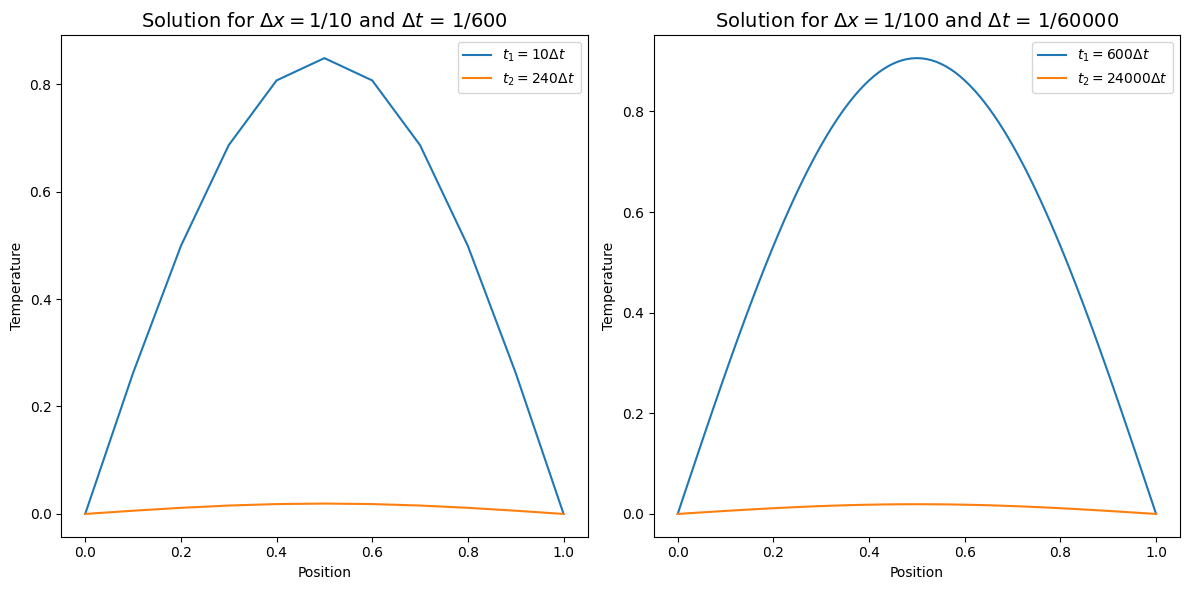

In [ ]:
t1_n10 = 10
t2_n10 = 240
x10 = np.linspace(0, 1, n10+1)
y_t1_n10 = u_n10[:, t1_n10]
y_t2_n10 = u_n10[:, t2_n10]

t1_n100 = 600
t2_n100 = 24000
x100 = np.linspace(0, 1, n100+1)
y_t1_n100 = u_n100[:, t1_n100]
y_t2_n100 = u_n100[:, t2_n100]

# Create a figure
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # (rows, columns)

# Plot on the first subplot
ax[0].plot(x10, y_t1_n10, label=rf'$t_1 = {t1_n10}\Delta t$')
ax[0].plot(x10, y_t2_n10, label=rf'$t_2 = {t2_n10}\Delta t$')
ax[0].set_title(rf'Solution for $\Delta x = 1/{n10}$ and $\Delta t$ = 1/{dt_n10}', fontsize=14)
ax[0].set_xlabel('Position')
ax[0].set_ylabel('Temperature')
ax[0].legend()

# Plot on the second subplot
ax[1].plot(x100, y_t1_n100, label=rf'$t_1 = {t1_n100}\Delta t$')
ax[1].plot(x100, y_t2_n100, label=rf'$t_2 = {t2_n100}\Delta t$')
ax[1].set_title(rf'Solution for $\Delta x = 1/{n100}$ and $\Delta t$ = 1/{dt_n100}', fontsize=14)
ax[1].set_xlabel('Position')
ax[1].set_ylabel('Temperature')
ax[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Save and show the plots
plt.savefig('../Figures/explicit_scheme_timepoints')
plt.show()


## Check different combinations of $\Delta x$ and $\Delta t$ outside stability criterion

### Try with $\Delta x = 1/10$ and varying $\Delta t$

In [ ]:
n1 = 10
t1 = 170
u_1 = explicit_scheme(n=n1, dt=t1)

alpha = 0.5882352941176471


38.86528864483612


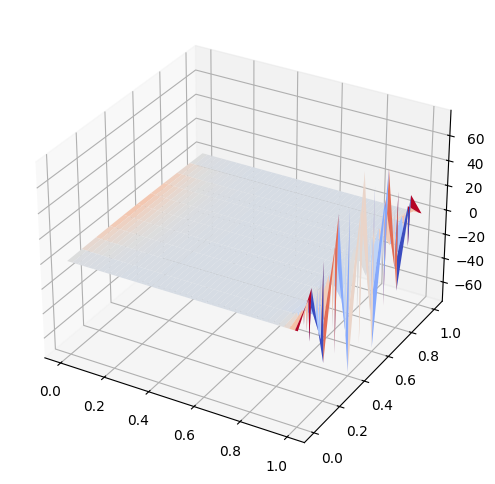

In [ ]:
x1 = np.linspace(0,1,n1+1)
y1 = np.linspace(0,1,t1+1)
X1, Y1 = np.meshgrid(x1,y1)

# Analytical solution on the same grid
analytical1 = analytical_solution(X1, Y1)
MSE1 = ((u_1.T - analytical1)**2).mean()
print(MSE1)

fig = plt.figure(figsize=(8, 6))    # Create a figure
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot

surface = ax.plot_surface(Y1, X1, u_1.T, cmap='coolwarm')
plt.show()

In [ ]:
n = 10
t1 = 190
t2 = 173
t3 = 170

u1 = explicit_scheme(n=n, dt=t1)
u2 = explicit_scheme(n=n, dt=t2)
u3 = explicit_scheme(n=n, dt=t3)

alpha = 0.5263157894736842
alpha = 0.5780346820809249
alpha = 0.5882352941176471


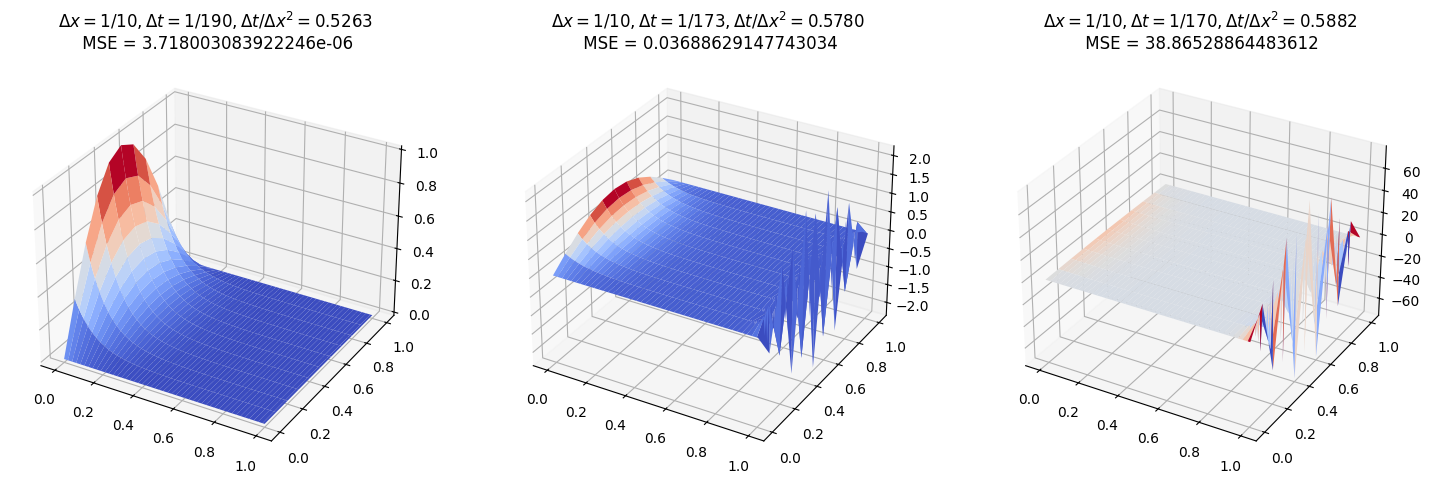

In [ ]:
# Create a figure
fig = plt.figure(figsize=(18, 6))
x = np.linspace(0, 1, n+1)

# Create first surface
alpha1 = n**2/t1
y1 = np.linspace(0, 1, t1+1)
X1, Y1 = np.meshgrid(x, y1)
analytical1 = analytical_solution(X1, Y1)
MSE1 = ((u1.T - analytical1)**2).mean()

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(Y1, X1, u1.T, cmap='coolwarm')
ax1.set_title(rf'$\Delta x=1/10, \Delta t=1/{t1}, \Delta t/\Delta x^2 = {alpha1:.4f}$' f'\n MSE = {MSE1}')

# Create second surface
alpha2 = n**2/t2
y2 = np.linspace(0, 1, t2+1)
X2, Y2 = np.meshgrid(x, y2)
analytical2 = analytical_solution(X2, Y2)
MSE2 = ((u2.T - analytical2)**2).mean()

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(Y2, X2, u2.T, cmap='coolwarm')
ax2.set_title(rf'$\Delta x=1/10, \Delta t=1/{t2}, \Delta t/\Delta x^2 = {alpha2:.4f}$' f'\n MSE = {MSE2}')

# Create third surface
alpha3 = n**2/t3
y3 = np.linspace(0, 1, t3+1)
X3, Y3 = np.meshgrid(x, y3)
analytical3 = analytical_solution(X3, Y3)
MSE3 = ((u3.T - analytical3)**2).mean()

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(Y3, X3, u3.T, cmap='coolwarm')
ax3.set_title(rf'$\Delta x=1/10, \Delta t=1/{t3}, \Delta t/\Delta x^2 = {alpha3:.4f}$' f'\n MSE = {MSE3}')

plt.savefig('../Figures/explicit_scheme_solutions_bad')
plt.show()

In [ ]:
n1 = 10
t1 = np.arange(210, 150, -1)
MSE_explicit = []

for t in t1:
    u_1 = explicit_scheme(n=n1, dt=t)
    x1 = np.linspace(0,1,n1+1)
    y1 = np.linspace(0,1,t+1)
    X1, Y1 = np.meshgrid(x1,y1)

    # Analytical solution on the same grid
    analytical1 = analytical_solution(X1, Y1)
    MSE1 = ((u_1.T - analytical1)**2).mean()
    MSE_explicit.append(MSE1)

alpha = 0.47619047619047616
alpha = 0.4784688995215311
alpha = 0.4807692307692308
alpha = 0.4830917874396135
alpha = 0.4854368932038835
alpha = 0.4878048780487805
alpha = 0.49019607843137253
alpha = 0.49261083743842365
alpha = 0.49504950495049505
alpha = 0.4975124378109453
alpha = 0.5
alpha = 0.5025125628140703
alpha = 0.5050505050505051
alpha = 0.5076142131979695
alpha = 0.5102040816326531
alpha = 0.5128205128205128
alpha = 0.5154639175257731
alpha = 0.5181347150259067
alpha = 0.5208333333333334
alpha = 0.5235602094240838
alpha = 0.5263157894736842
alpha = 0.5291005291005291
alpha = 0.5319148936170213
alpha = 0.5347593582887701
alpha = 0.5376344086021505
alpha = 0.5405405405405406
alpha = 0.5434782608695652
alpha = 0.546448087431694
alpha = 0.5494505494505495
alpha = 0.5524861878453039
alpha = 0.5555555555555556
alpha = 0.5586592178770949
alpha = 0.5617977528089888
alpha = 0.5649717514124294
alpha = 0.5681818181818182
alpha = 0.5714285714285714
alpha = 0.5747126436781609
alpha = 0.578

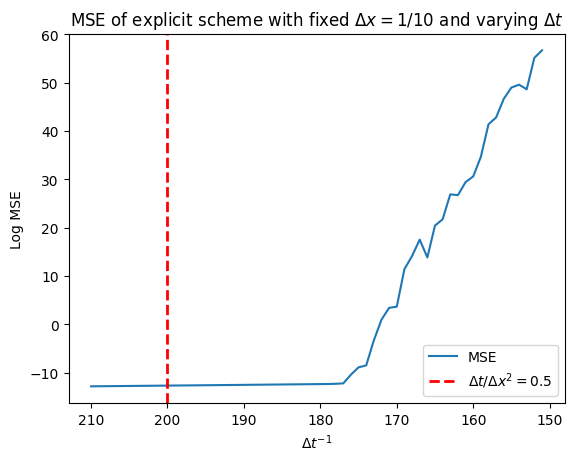

In [ ]:
plt.plot(t1, np.log(MSE_explicit), label='MSE')
plt.axvline(x=200, color='r', linestyle='--', linewidth=2, label=r"$\Delta t/\Delta x^2=0.5$")
plt.gca().invert_xaxis()  # Invert the x-axis
plt.xlabel(r'$\Delta t^{-1}$')
plt.ylabel('Log MSE')
plt.title(rf'MSE of explicit scheme with fixed $\Delta x = 1/{n1}$ and varying $\Delta t$')
plt.legend()
plt.show()

## Train similar NN-models for comparison

### FFNN

Optimal parameters:
* 3 hidden layers
* 20 nodes per layer
* sigmoid activation function
* learning rate 0.1

Epoch 0, Loss: 14.480710983276367
Epoch 100, Loss: 1.8134609460830688
Epoch 200, Loss: 0.3156968355178833
Epoch 300, Loss: 0.0846949890255928
Epoch 400, Loss: 0.04353310912847519
Epoch 500, Loss: 0.023482227697968483
Epoch 600, Loss: 0.015248779207468033
Epoch 700, Loss: 0.024680262431502342
Epoch 800, Loss: 0.006531216204166412
Epoch 900, Loss: 0.014177607372403145


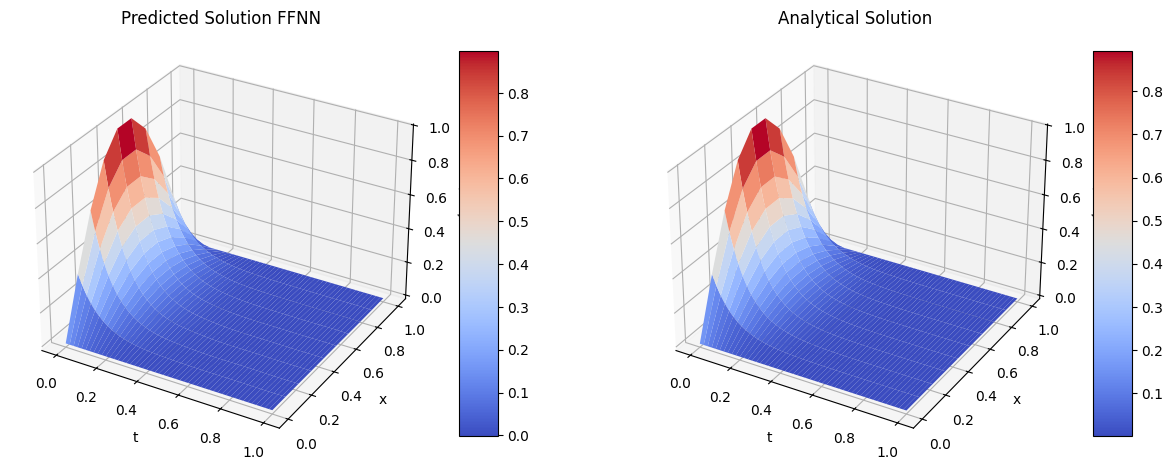

In [ ]:
# Test with x=10, t=200 and optimal hyperparameters

import functions as func
import tensorflow as tf

# Set grid dimensions
n = 10
t = 200

# Set hyperparameters
num_hidden_layers = 3
num_nodes_per_layer = 20
activation = 'sigmoid'
learning_rate = 0.1
epochs = 1000

# Create input grid
x = tf.linspace(0.0, 1.0, n)
t = tf.linspace(0.0, 1.0, t)
X, T = tf.meshgrid(x,t)
x_flat = tf.reshape(X, (-1,1))
t_flat = tf.reshape(T, (-1,1))
inputs = tf.concat([x_flat, t_flat], axis=1)

# Initialize and train model
model = func.DiffusionNN(num_hidden_layers, num_nodes_per_layer, activation)
optimizer = tf.keras.optimizers.Adam(learning_rate)
func.train_model(model, optimizer, x_flat, t_flat, epochs)
nn_output = model(inputs)
u_nn = func.trial_solution(x_flat, t_flat, nn_output)
U_nn = tf.reshape(u_nn, X.shape).numpy()
U_analytical = func.analytical_solution(X.numpy(), T.numpy())

# Plot both solutions in the same figure
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121, projection='3d')
surface_nn = ax1.plot_surface(T.numpy(), X.numpy(), U_nn, cmap='coolwarm', edgecolor='none')
fig.colorbar(surface_nn, ax=ax1, shrink=0.5, aspect=10)
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.set_zlabel('u(x, t)')
ax1.set_title('Predicted Solution FFNN')
ax1.view_init(elev=30, azim=-60) 

ax2 = fig.add_subplot(122, projection='3d')
surface_analytical = ax2.plot_surface(T.numpy(), X.numpy(), U_analytical, cmap='coolwarm', edgecolor='none')
fig.colorbar(surface_analytical, ax=ax2, shrink=0.5, aspect=10)
ax2.set_xlabel('t')
ax2.set_ylabel('x')
ax2.set_zlabel('u(x, t)')
ax2.set_title('Analytical Solution')
ax2.view_init(elev=30, azim=-60)

plt.show()

In [ ]:
MSE_test = ((U_analytical - U_nn)**2).mean()
MSE_test

4.5134112e-07

#### All timesteps FFNN

In [ ]:
n = 10
t_nn = np.arange(210, 145, -5)
MSE_nn = []

# Set hyperparameters
num_hidden_layers = 3
num_nodes_per_layer = 20
activation = 'sigmoid'
learning_rate = 0.1
epochs = 1000

for t in t_nn:
    # Create input grid
    x = tf.linspace(0.0, 1.0, n)
    t = tf.linspace(0.0, 1.0, t)
    X, T = tf.meshgrid(x,t)
    x_flat = tf.reshape(X, (-1,1))
    t_flat = tf.reshape(T, (-1,1))
    inputs = tf.concat([x_flat, t_flat], axis=1)

    # Initialize and train model
    model = func.DiffusionNN(num_hidden_layers, num_nodes_per_layer, activation)
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    func.train_model(model, optimizer, x_flat, t_flat, epochs)
    nn_output = model(inputs)
    u_nn = func.trial_solution(x_flat, t_flat, nn_output)
    U_nn = tf.reshape(u_nn, X.shape).numpy()
    U_analytical = func.analytical_solution(X.numpy(), T.numpy())

    MSE = ((U_analytical - U_nn)**2).mean()
    MSE_nn.append(MSE)

Epoch 0, Loss: 9.009795188903809
Epoch 100, Loss: 8.82056999206543
Epoch 200, Loss: 8.82050895690918
Epoch 300, Loss: 8.82050609588623
Epoch 400, Loss: 8.820504188537598
Epoch 500, Loss: 8.820502281188965
Epoch 600, Loss: 8.820499420166016
Epoch 700, Loss: 8.820497512817383
Epoch 800, Loss: 8.820491790771484
Epoch 900, Loss: 8.820481300354004
Epoch 0, Loss: 9.132709503173828
Epoch 100, Loss: 0.9030670523643494
Epoch 200, Loss: 0.2699097990989685
Epoch 300, Loss: 0.031262803822755814
Epoch 400, Loss: 0.012833795510232449
Epoch 500, Loss: 0.006908300798386335
Epoch 600, Loss: 0.004094037227332592
Epoch 700, Loss: 0.004529302474111319
Epoch 800, Loss: 0.021546483039855957
Epoch 900, Loss: 0.001250741071999073
Epoch 0, Loss: 11.22414493560791
Epoch 100, Loss: 0.36254772543907166
Epoch 200, Loss: 0.04304292052984238
Epoch 300, Loss: 0.036290522664785385
Epoch 400, Loss: 0.019698096439242363
Epoch 500, Loss: 0.004429822321981192
Epoch 600, Loss: 0.0032803888898342848
Epoch 700, Loss: 0.00345

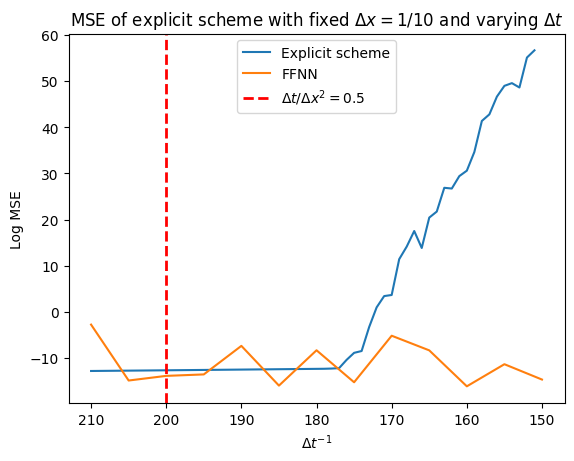

In [ ]:
plt.plot(t1, np.log(MSE_explicit), label='Explicit scheme')
plt.plot(t_nn, np.log(MSE_nn), label='FFNN')
plt.axvline(x=200, color='r', linestyle='--', linewidth=2, label=r"$\Delta t/\Delta x^2=0.5$")
plt.gca().invert_xaxis()  # Invert the x-axis
plt.xlabel(r'$\Delta t^{-1}$')
plt.ylabel('Log MSE')
plt.title(rf'MSE of explicit scheme with fixed $\Delta x = 1/{n1}$ and varying $\Delta t$')
plt.legend()
plt.show()

### RNN

Optimal parameters
* 3 hidden layers
* 20 nodes per layer
* tanh activation function
* learning rate 0.01

/opt/anaconda3/envs/mlproject2/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 0, Loss: 0.07612979412078857
Epoch 100, Loss: 0.0017795417224988341
Epoch 200, Loss: 0.0006569042452611029
Epoch 300, Loss: 0.00045160946319811046
Epoch 400, Loss: 0.0007873193244449794
Epoch 500, Loss: 0.00036484748125076294
Epoch 600, Loss: 0.0011473392369225621
Epoch 700, Loss: 0.00014601861767005175
Epoch 800, Loss: 0.00012609607074409723
Epoch 900, Loss: 9.463064634473994e-05
0.00021106303


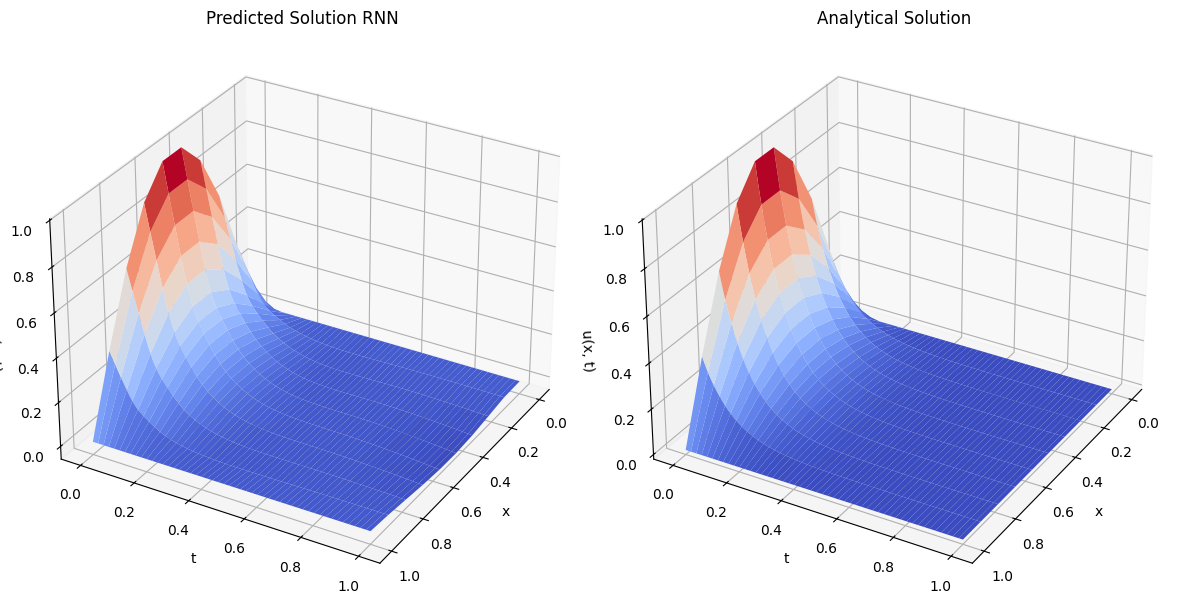

In [ ]:
n = 10
#t_RNN = np.arange(210, 145, -5)
t = 200

num_hidden_layers = 3
num_units_per_layer = 20
activation = 'tanh'
learning_rate = 0.01
epochs = 1000

x = tf.reshape(tf.linspace(0.0, 1.0, n), (-1,1))
t = tf.reshape(tf.linspace(0.0, 1.0, t), (-1,1))
X, T = tf.meshgrid(x,t)
x_flat = tf.reshape(X, (-1,1))
t_flat = tf.reshape(T, (-1,1))

U_analytical = analytical_solution(X, T)
u_true = tf.reshape(U_analytical, (-1,1))

model = func.build_rnn(num_hidden_layers, num_units_per_layer, activation)
optimizer = tf.keras.optimizers.Adam(learning_rate)
func.train_model_RNN(model, x_flat, t_flat, u_true, optimizer, epochs)

inputs = func.reshape_for_rnn(x_flat, t_flat)
nn_output = model(inputs)
u_pred = func.trial_solution(x_flat, t_flat, nn_output)
U_pred = tf.reshape(u_pred, X.shape).numpy()
MSE = func.loss_fn(model, x_flat, t_flat, u_true).numpy()
print(MSE)

# Plot the results
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
func.plot_solution(X.numpy(), T.numpy(), U_pred, "Predicted Solution RNN", ax1)
ax1.view_init(elev=30, azim=30)  # Adjust view angle
ax2 = fig.add_subplot(122, projection='3d')
func.plot_solution(X.numpy(), T.numpy(), U_analytical, "Analytical Solution", ax2)
ax2.view_init(elev=30, azim=30)  # Adjust view angle

plt.tight_layout()
plt.show()

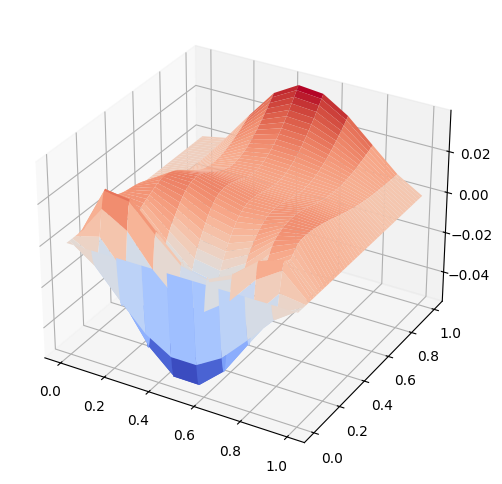

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(projection='3d')
ax1.plot_surface(X.numpy(), T.numpy(), U_analytical-U_pred, cmap='coolwarm')
plt.show()

#### All timesteps RNN

In [ ]:
n = 10
t_RNN = np.arange(210, 145, -5)
MSE_rnn = []

# Set hyperparameters
num_hidden_layers = 3
num_units_per_layer = 20
activation = 'tanh'
learning_rate = 0.01
epochs = 1000

for t in t_RNN:

    # Create input grid
    x = tf.reshape(tf.linspace(0.0, 1.0, n), (-1,1))
    t = tf.reshape(tf.linspace(0.0, 1.0, t), (-1,1))
    X, T = tf.meshgrid(x,t)
    x_flat = tf.reshape(X, (-1,1))
    t_flat = tf.reshape(T, (-1,1))

    # Create analytica solution
    U_analytical = analytical_solution(X, T)
    u_true = tf.reshape(U_analytical, (-1,1))

    # Initialize and train model
    model = func.build_rnn(num_hidden_layers, num_units_per_layer, activation)
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    func.train_model_RNN(model, x_flat, t_flat, u_true, optimizer, epochs)

    # Calculat MSE error
    MSE = func.loss_fn(model, x_flat, t_flat, u_true).numpy()
    MSE_rnn.append(MSE)

/opt/anaconda3/envs/mlproject2/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 0, Loss: 0.09861373901367188
Epoch 100, Loss: 0.002211829647421837
Epoch 200, Loss: 0.0007904069498181343
Epoch 300, Loss: 0.0006986430380493402
Epoch 400, Loss: 0.0005848582368344069
Epoch 500, Loss: 0.0002726867387536913
Epoch 600, Loss: 0.000214623476495035
Epoch 700, Loss: 0.0002114827511832118
Epoch 800, Loss: 0.00015894899843260646
Epoch 900, Loss: 0.00012719008373096585
Epoch 0, Loss: 0.07310860604047775
Epoch 100, Loss: 0.001609291066415608
Epoch 200, Loss: 0.0006784462602809072
Epoch 300, Loss: 0.00040399370482191443
Epoch 400, Loss: 0.0002918248646892607
Epoch 500, Loss: 0.00023464846890419722
Epoch 600, Loss: 0.00018165686924476177
Epoch 700, Loss: 0.00015036277181934565
Epoch 800, Loss: 0.00011638180876616389
Epoch 900, Loss: 0.00012155045988038182
Epoch 0, Loss: 0.08618129789829254
Epoch 100, Loss: 0.0022271261550486088
Epoch 200, Loss: 0.0008472453919239342
Epoch 300, Loss: 0.0004449287662282586
Epoch 400, Loss: 0.00030783654074184597
Epoch 500, Loss: 0.000215530002

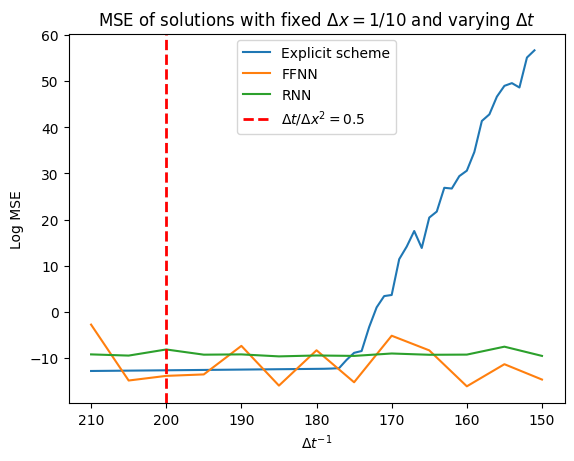

In [ ]:
plt.plot(t1, np.log(MSE_explicit), label='Explicit scheme')
plt.plot(t_nn, np.log(MSE_nn), label='FFNN')
plt.plot(t_RNN, np.log(MSE_rnn), label='RNN')
plt.axvline(x=200, color='r', linestyle='--', linewidth=2, label=r"$\Delta t/\Delta x^2=0.5$")
plt.gca().invert_xaxis()  # Invert the x-axis
plt.xlabel(r'$\Delta t^{-1}$')
plt.ylabel('Log MSE')
plt.title(rf'MSE of solutions with fixed $\Delta x = 1/{n1}$ and varying $\Delta t$')
plt.legend()
plt.savefig('../Figures/comparing_methods')
plt.show()